In [1]:
import os 
import pandas as pd
import numpy as np 
os.chdir("/home/ravi/Downloads/quora-question-pairs/")

# Train Data Exploration

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.shape

(404290, 6)

In [4]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], dtype='object')

In [5]:
df.drop(['qid1','qid2','id'],axis=1,inplace=True)

# Class Imbalance
class imbalance is present in the target value
We have 255027 samples of different questions and 149263 of duplicate questions

In [6]:
df.is_duplicate.value_counts()

0    255027
1    149263
Name: is_duplicate, dtype: int64

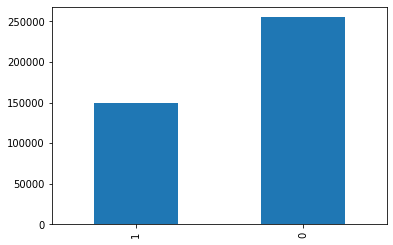

In [7]:
df.is_duplicate.value_counts().sort_values().plot(kind = 'bar')

In [8]:
#seems there are no duplicates in the training data, lets check for question wise duplicates
print(f"Shape before dropping the duplicates : {df.shape}")
print(f"Shape after dropping the duplicates : {df.drop_duplicates().shape}")

Shape before dropping the duplicates : (404290, 3)
Shape after dropping the duplicates : (404290, 3)


In [9]:
# There are duplicated questions in both of the question columns ,but they are forming different pairs
print(f"No of unique questions in question1 columns {df.question1.drop_duplicates().shape}")
print(f"No of unique questions in question2 columns {df.question2.drop_duplicates().shape}")

No of unique questions in question1 columns (290457,)
No of unique questions in question2 columns (299175,)


In [10]:
#Lets check how many times each question in question1 column is repeated
print(df.question1.value_counts().sort_values(ascending=False))

How do I improve my English speaking?                                                                         50
How does the ban on 500 and 1000 rupee notes helps to identify black money and corruption?                    48
What should I do to earn money online?                                                                        47
How do I improve my English language?                                                                         47
How can changing 500 and 1000 rupee notes end the black money in India?                                       47
                                                                                                              ..
What are your favorite indie/alternative bands?                                                                1
What API exists to control UAVs?                                                                               1
How does the greenhouse effect contribute to climate change?                                    

In [11]:
# Now checking for the questions in question2 column
print(df.question2.value_counts().sort_values(ascending=False))

How can you look at someone's private Instagram account without following them?                                                                         120
What are the best ways to lose weight?                                                                                                                  119
How can I lose weight quickly?                                                                                                                          100
What's the easiest way to make money online?                                                                                                             71
What are some things new employees should know going into their first day at AT&T?                                                                       66
                                                                                                                                                       ... 
How does Mad Max: Fury Road resonate with the newer, younger gen

In [12]:
#Check are there any same questions in both rows and target value given as "they are different".Luckily we dont have any
#of those samples
df[(df['question1']==df['question2']) & (df['is_duplicate']==0)]

,question1,question2,is_duplicate


In [13]:
for i in df.itertuples():
    print("="*25)
    print(f"Question1: {i.question1}")
    print(f"Question2: {i.question2}")
    print(f"Duplicate: {i.is_duplicate}")
    if i.Index==25:
        break

Question1: What is the step by step guide to invest in share market in india?
Question2: What is the step by step guide to invest in share market?
Duplicate: 0
Question1: What is the story of Kohinoor (Koh-i-Noor) Diamond?
Question2: What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?
Duplicate: 0
Question1: How can I increase the speed of my internet connection while using a VPN?
Question2: How can Internet speed be increased by hacking through DNS?
Duplicate: 0
Question1: Why am I mentally very lonely? How can I solve it?
Question2: Find the remainder when [math]23^{24}[/math] is divided by 24,23?
Duplicate: 0
Question1: Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?
Question2: Which fish would survive in salt water?
Duplicate: 0
Question1: Astrology: I am a Capricorn Sun Cap moon and cap rising...what does that say about me?
Question2: I'm a triple Capricorn (Sun, Moon and ascendant in Capricorn) What does this say a

# Test Data Exploration

In [14]:
!ls

DataExploration.ipynb	   test.csv	 train.csv
sample_submission.csv.zip  test.csv.zip  train.csv.zip


In [15]:
test=pd.read_csv('test.csv')

In [16]:
#dimensions of the test data, test data is vey big compared to the train data.It is nearly 5.8 times of train data
test.shape

(2345796, 3)

In [17]:
#checking no of duplicate questions in both question1 and question2 columns
print(f"No of unique questions in question1 column: {test.question1.drop_duplicates().shape}")
print(f"No of unique questions in question2 column: {test.question2.drop_duplicates().shape}")
#There are some duplicate questions in the both columns 

No of unique questions in question1 column: (2211009,)
No of unique questions in question2 column: (2227400,)


In [18]:
#checking how many times each question repeated in both question1 and question2 columns
print(f"No of times the questions are repeated in question1 column :\n{test.question1.value_counts().sort_values(ascending=False)}")

No of times the questions are repeated in question1 column :
What                                                                                                                                                                                       1344
How                                                                                                                                                                                         903
What is                                                                                                                                                                                     618
What are                                                                                                                                                                                    403
What is the                                                                                                                                                                

In [19]:
print(f"No of times the questions are repeated in question2 column :\n{test.question2.value_counts().sort_values(ascending=False)}")

No of times the questions are repeated in question2 column :
What                                                                    1342
How                                                                      945
What is                                                                  594
What are                                                                 400
How do                                                                   395
                                                                        ... 
What is it like to have a prosthetic leg?                                  1
Would you fight Gandhi like Tyler Durden (Fight Club) cbse do?             1
What are examples of information had systems?                              1
How can you cut a much Chinese-style?                                      1
Were German generals chocolate confident they could defeat the USSR?       1
Name: question2, Length: 2227399, dtype: int64


Seems there are more number of duplicates questionsand they are forming different pairs creating a graph like structure.This might be useful when we want to include other information of the question for prediction.